## Step 0: Enable IMAP Access and Generate Credentials

1. **Enable IMAP Access:** The first thing you need to do is to "Enable IMAP Access" in the "IMAP Access" section of Gmail. This will allow you to access your Gmail account from any device.

2. **Generate Application-Specific Password:** Next, you should generate an [app password](https://myaccount.google.com/apppasswords). You will use this password to log in to Gmail from Python.

In [1]:
# Import the required libraries for handling IMAP, email, and email headers
import imaplib
import email
from email.header import decode_header

# Import pandas for data manipulation and tqdm for progress bars
import pandas as pd
from tqdm import tqdm

# Import numpy for numerical operations and PIL for image handling
import numpy as np
from PIL import Image

# Import matplotlib for data visualization and LinearSegmentedColormap for custom color palettes
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Import WordCloud and STOPWORDS for creating and customizing word clouds
from wordcloud import WordCloud, STOPWORDS


## Step 1: Access Gmail with the Credentials

In this step, you will log in to your Gmail account using the credentials you've obtained or generated in the previous steps.

In [174]:
# Define the Gmail email address and password for authentication
user, password = "er.samekj@gmail.com", "apvp cngu fxqu xoex"

In [47]:
# Define the Gmail email address and password for authentication
user, password = "samekj.jurado@gmail.com", "ntza qtyl tuym hhex"

In [48]:
# Define the Gmail email address and password for authentication
user, password = "lowkey.to77@gmail.com", "zkvj cofh mtfo nzll"

In [175]:
# Define the IMAP server URL for Gmail
imap_url = 'imap.gmail.com'

# Create an instance of IMAP4_SSL for secure connection to Gmail's IMAP server
my_mail = imaplib.IMAP4_SSL(imap_url)

# Authenticate the Gmail account using the provided email address and password
my_mail.login(user, password)

('OK', [b'er.samekj@gmail.com authenticated (Success)'])

In [176]:
# Select All Emails in the Inbox
my_mail.select('Inbox')

('OK', [b'637'])

In [177]:
# Get the total number of emails in the 'Inbox' folder and store it in 'all_mail'
all_mail = int(my_mail.select('Inbox')[1][0].decode('utf-8'))

# Print the total number of emails
print(f"Total number of emails in the 'Inbox' folder: {all_mail}")

Total number of emails in the 'Inbox' folder: 637


### Step 2: Obtain Emails

In [178]:
# Create an empty DataFrame to store email data with columns: 'Date', 'From', 'Subject'
email_df = pd.DataFrame(columns=['Date', 'From', 'Subject'], index=range(all_mail, 0, -1))

# Iterate through emails in reverse order and fetch email data (UID and RFC822)
for i in tqdm(range(all_mail, 0, -1)):
    data = my_mail.fetch(str(i), '(UID RFC822)')
    arr = data[1][0]
    
    # Check if the content is a tuple, and parse the email message (using 'utf-8' encoding if possible)
    if isinstance(arr, tuple):
        try: msg = email.message_from_string(str(arr[1], 'utf-8'))
        except: msg = email.message_from_string(str(arr[1], 'latin-1'))
        
        # Create a new row with email data and add it to the DataFrame
        new_row = pd.Series({"Date": msg['Date'], "From": msg['from'], "Subject": msg['subject']})
        
    # Append the new row to the DataFrame
    email_df = email_df.append(new_row, ignore_index=True)

# Drop rows with all NaN values and reset the DataFrame index
email_df = email_df.dropna(how='all').reset_index(drop=True)

  0%|          | 0/637 [00:00<?, ?it/s]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/1914392532.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 1/637 [00:04<49:45,  4.69s/it]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/1914392532.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 2/637 [00:05<24:47,  2.34s/it]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/1914392532.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 3/637 [00:06<17:23,  1.65s/it]/

In [53]:
import pandas as pd
import email

# Create an empty DataFrame to store email data with columns: 'Date', 'From', 'Subject'
email_df = pd.DataFrame(columns=['Date', 'From', 'Subject'])

# Iterate through emails and fetch email data
for i in tqdm(range(1, all_mail + 1)):  # Assuming 'all_mail' is defined
    data = my_mail.fetch(str(i), '(UID RFC822)')
    arr = data[1][0]
    
    # Check if the content is a tuple
    if isinstance(arr, tuple):
        try:
            msg = email.message_from_bytes(arr[1])
            date = msg['Date']
            sender = msg['From']
            subject = msg['Subject']
            
            # Create a new row with email data and add it to the DataFrame
            new_row = pd.Series({"Date": date, "From": sender, "Subject": subject})
            
            # Append the new row to the DataFrame
            email_df = email_df.append(new_row, ignore_index=True)
        except Exception as e:
            print(f"Error parsing email {i}: {e}")

# Drop rows with any NaN values and reset the DataFrame index
email_df = email_df.dropna().reset_index(drop=True)

  0%|          | 0/8133 [00:00<?, ?it/s]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/2181316647.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 1/8133 [00:00<49:54,  2.72it/s]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/2181316647.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 2/8133 [00:00<34:48,  3.89it/s]/var/folders/5g/483hprsx7c395rsxfpgls3rr0000gn/T/ipykernel_87555/2181316647.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  email_df = email_df.append(new_row, ignore_index=True)
  0%|          | 3/8133 [00:00<29:44,  4.55it

In [179]:
# Make a copy of the original DataFrame email_df
email_df_copy = email_df.copy()

In [186]:
email_df = email_df_copy.copy()

##### Como se están extrayendo una gran cantidad de correos, el proceso tiende a demorarse un poco (2168 mails ~ 17min). Por esa razón, guardamos el dataframe email_df en un csv.

In [180]:
email_df.to_csv('/Users/skj/Documents/GOOGLE DATA ANALYTICS/gmail case/email_df_ES.csv', index=False, encoding='utf-8')

In [187]:
print(email_df.shape)

(637, 3)


##### Nota:  Usando <b>msg.keys()</b> se pueden observar todos las variables posibles a extraer, la razón de por qué nos quedamos con 3 se debe a que son las que mejor se pueden explotar. Un sample de valores de todas las variables está en el archivo <b>msg_keys.txt</b> de la carpeta [Resources](https://github.com/Sandreke/Gmail-Data-Analysis-with-Python-and-PowerBI/tree/main/Resources)

In [182]:
print(msg.keys())

['Delivered-To', 'Received', 'X-Received', 'ARC-Seal', 'ARC-Message-Signature', 'ARC-Authentication-Results', 'Return-Path', 'Received', 'Received-SPF', 'Authentication-Results', 'DKIM-Signature', 'X-Google-DKIM-Signature', 'X-Gm-Message-State', 'X-Google-Smtp-Source', 'MIME-Version', 'X-Received', 'Date', 'Reply-To', 'Feedback-ID', 'X-Notifications', 'X-Notifications-Bounce-Info', 'Message-ID', 'Subject', 'From', 'To', 'Content-Type']


### Paso 3: Limpieza y transformación de datos

##### 3.1. *Date* column

In [183]:
def clean_date(x):
    if ',' not in x: x = ', ' + x
    if '(' in x: x = ' '.join(x.split(' ')[:-1])
    x = ' '.join(x.split(' ')[:-1])
    return x

In [184]:
email_df.head(5936)

,Date,From,Subject
0,"Wed, 20 Sep 2023 00:06:14 GMT",Google <no-reply@accounts.google.com>,Alerta de seguridad para samekj.jurado@gmail.com
1,"Tue, 19 Sep 2023 21:31:09 GMT",Google <no-reply@accounts.google.com>,Security alert
2,"Mon, 18 Sep 2023 17:57:48 +0000 (UTC)",Meetup <info@meetup.com>,Top suggestions for you this week
3,"Mon, 18 Sep 2023 11:29:48 -0300",=?UTF-8?Q?Administraci=C3=B3n_Henry?= <adminis...,=?utf-8?Q?=F0=9F=91=80Reminder_=C2=A1Tenemos_u...
4,"Mon, 18 Sep 2023 01:06:55 +0000 (UTC)",Empleos de Glassdoor <noreply@glassdoor.com>,Data Analyst (Power BI) en sngular y 19 empleo...
...,...,...,...
632,"Sat, 10 Sep 2022 01:43:10 GMT",Google <no-reply@accounts.google.com>,Help strengthen the security of your Google Ac...
633,"Sat, 10 Sep 2022 03:46:02 +0000",Formularios de Google <forms-receipts-noreply@...,=?UTF-8?Q?=F0=9F=8F=86_Premio_Kybernus_al_Lide...
634,"Fri, 09 Sep 2022 17:50:56 GMT",Google <no-reply@accounts.google.com>,Security alert
635,"Sun, 4 Sep 2022 19:58:42 -0500",Mariana Cabello <marianacabelloc@gmail.com>,=?utf-8?Q?Art=C3=ADculo_?=


In [188]:
# Convert 'Date' to string and strip whitespace
email_df['Date'] = email_df['Date'].astype(str).str.strip()

# Transform the 'Date' column. From "Wed, 14 Sep 2022 17:38:23 +0000 (UTC)"
email_df['Date'] = email_df['Date'].apply(lambda x: clean_date(x))  # Extract "Wed, 14 Sep 2022 17:38:23"
email_df['Date'] = email_df['Date'].str.split(', ').str[-1]         # Extract "14 Sep 2022 17:38:23"
email_df['H_M_S'] = email_df['Date'].apply(lambda x: x[-8:])        # Extract "17:38:23" and create a new 'H_M_S' column

# Create an 'Hour' column with time intervals like "17h-18h"
email_df['Hour'] = email_df['H_M_S'].apply(lambda x: x[:2] + 'h-' + str(int(x[:2]) + 1).zfill(2) + 'h')

# Set the value at index 5934 to have two digits for the hour part
# email_df.loc[5934, 'Date'] = '12 Apr 2023 00:32:50'

# Transform the 'Date' column to get "14 Sep 2022" and format it as a datetime object
email_df['Date'] = email_df['Date'].apply(lambda x: x[:-9] if len(x[:-9]) == 11 else '0' + x[:-9])
email_df['Date'] = pd.to_datetime(email_df['Date'], format='%d %b %Y')

# Create a 'WeekDay' column to extract the weekday like "Wednesday"
email_df['WeekDay'] = email_df['Date'].dt.strftime('%A')

email_df.head()  # Display the updated DataFrame


,Date,From,Subject,H_M_S,Hour,WeekDay
0,2023-09-20,Google <no-reply@accounts.google.com>,Alerta de seguridad para samekj.jurado@gmail.com,00:06:14,00h-01h,Wednesday
1,2023-09-19,Google <no-reply@accounts.google.com>,Security alert,21:31:09,21h-22h,Tuesday
2,2023-09-18,Meetup <info@meetup.com>,Top suggestions for you this week,17:57:48,17h-18h,Monday
3,2023-09-18,=?UTF-8?Q?Administraci=C3=B3n_Henry?= <adminis...,=?utf-8?Q?=F0=9F=91=80Reminder_=C2=A1Tenemos_u...,11:29:48,11h-12h,Monday
4,2023-09-18,Empleos de Glassdoor <noreply@glassdoor.com>,Data Analyst (Power BI) en sngular y 19 empleo...,01:06:55,01h-02h,Monday


##### 3.2. *From* and *Subject* columns

In [189]:
# Function to obtain the email address from a string in the format "Name <email@example.com>"
def extract_email_from(x):
    # Split the input string 'x' by '<' and select the email address part between '<' and '>'
    x_mod = x.split('<')[-1].split('>')[0]
    return x_mod

# Function to obtain the name or sender from an email address string with optional encoding
def extract_name_from(x):
    # Decode the input 'x' to handle encoding, then remove extra characters and return the name
    text, encoding = decode_header(x)[0]
    if not encoding and isinstance(text, str):
        text = ' '.join(text.split(' ')[:-1])
    else:
        text = text.decode('utf-8', errors='ignore')
    text = text.replace('"', '')
    return text

# Function to clean and decode the subject line of an email
def clean_subject_line(x):
    if x:
        # Decode the subject line and handle encoding errors, if any
        text, encoding = decode_header(x)[0]
        try:
            text = text.decode('utf-8', errors='ignore')
        except:
            pass
    else:
        text = x
    return text


In [190]:
# Extract email addresses from the 'From' column and create a new 'Mail' column
email_df['Mail'] = email_df['From'].apply(lambda x: extract_email_from(x))

# Extract sender names from the 'From' column and create a new 'Name' column
email_df['Name'] = email_df['From'].apply(lambda x: extract_name_from(x))

# Clean and decode subject lines in the 'Subject' column
email_df['Subject'] = email_df['Subject'].apply(lambda x: clean_subject_line(x))

# Drop the 'From' column and reorder columns in the DataFrame
email_df = email_df.drop(columns=['From'])[['Date', 'H_M_S', 'Hour', 'WeekDay', 'Mail', 'Name', 'Subject']]

# Display the first few rows of the updated DataFrame
email_df.head()


,Date,H_M_S,Hour,WeekDay,Mail,Name,Subject
0,2023-09-20,00:06:14,00h-01h,Wednesday,no-reply@accounts.google.com,Google,Alerta de seguridad para samekj.jurado@gmail.com
1,2023-09-19,21:31:09,21h-22h,Tuesday,no-reply@accounts.google.com,Google,Security alert
2,2023-09-18,17:57:48,17h-18h,Monday,info@meetup.com,Meetup,Top suggestions for you this week
3,2023-09-18,11:29:48,11h-12h,Monday,administracion@soyhenry.com,Administración Henry,👀Reminder ¡Tenemos una opción de pago para vos...
4,2023-09-18,01:06:55,01h-02h,Monday,noreply@glassdoor.com,Empleos de Glassdoor,Data Analyst (Power BI) en sngular y 19 empleos


In [192]:
# Save the DataFrame 'email_df' to a CSV file with the specified path and encoding
email_df.to_csv('/Users/skj/Documents/GOOGLE DATA ANALYTICS/gmail case/email_df_final_LK.csv', index=False, encoding='utf-8')

In [193]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     637 non-null    datetime64[ns]
 1   H_M_S    637 non-null    object        
 2   Hour     637 non-null    object        
 3   WeekDay  637 non-null    object        
 4   Mail     637 non-null    object        
 5   Name     637 non-null    object        
 6   Subject  637 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 35.0+ KB


### Paso 4:  Plotear Word Cloud de los asuntos de los correos (columna *Subject*)

In [171]:
# Scale RGB values from 0 to 1
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

# Define Gmail logo colors
# Maroon (197, 34, 31), Green (52, 168, 83), Blue (66, 133, 244), Red (234, 67, 53), Yellow (251, 188, 4)
cdict = {'red':((0.0,inter_from_256(197),inter_from_256(197)),
               (1/5*1,inter_from_256(52),inter_from_256(52)),
               (1/5*3,inter_from_256(66),inter_from_256(66)),
               (1/5*4,inter_from_256(234),inter_from_256(234)),
               (1.0,inter_from_256(251),inter_from_256(251))),
        'green':((0.0, inter_from_256(34), inter_from_256(34)),
               (1/5*1, inter_from_256(168), inter_from_256(168)),
               (1/5*3, inter_from_256(133), inter_from_256(133)),
               (1/5*4, inter_from_256(67), inter_from_256(67)),
               (1.0, inter_from_256(188), inter_from_256(188))),
        'blue':((0.0, inter_from_256(31), inter_from_256(31)),
               (1/5*1, inter_from_256(83), inter_from_256(83)),
               (1/5*3, inter_from_256(244), inter_from_256(244)),
               (1/5*4, inter_from_256(53), inter_from_256(53)),
               (1.0, inter_from_256(4), inter_from_256(4))),}

# Create a custom color palette
gmail = LinearSegmentedColormap('gmail',segmentdata=cdict)

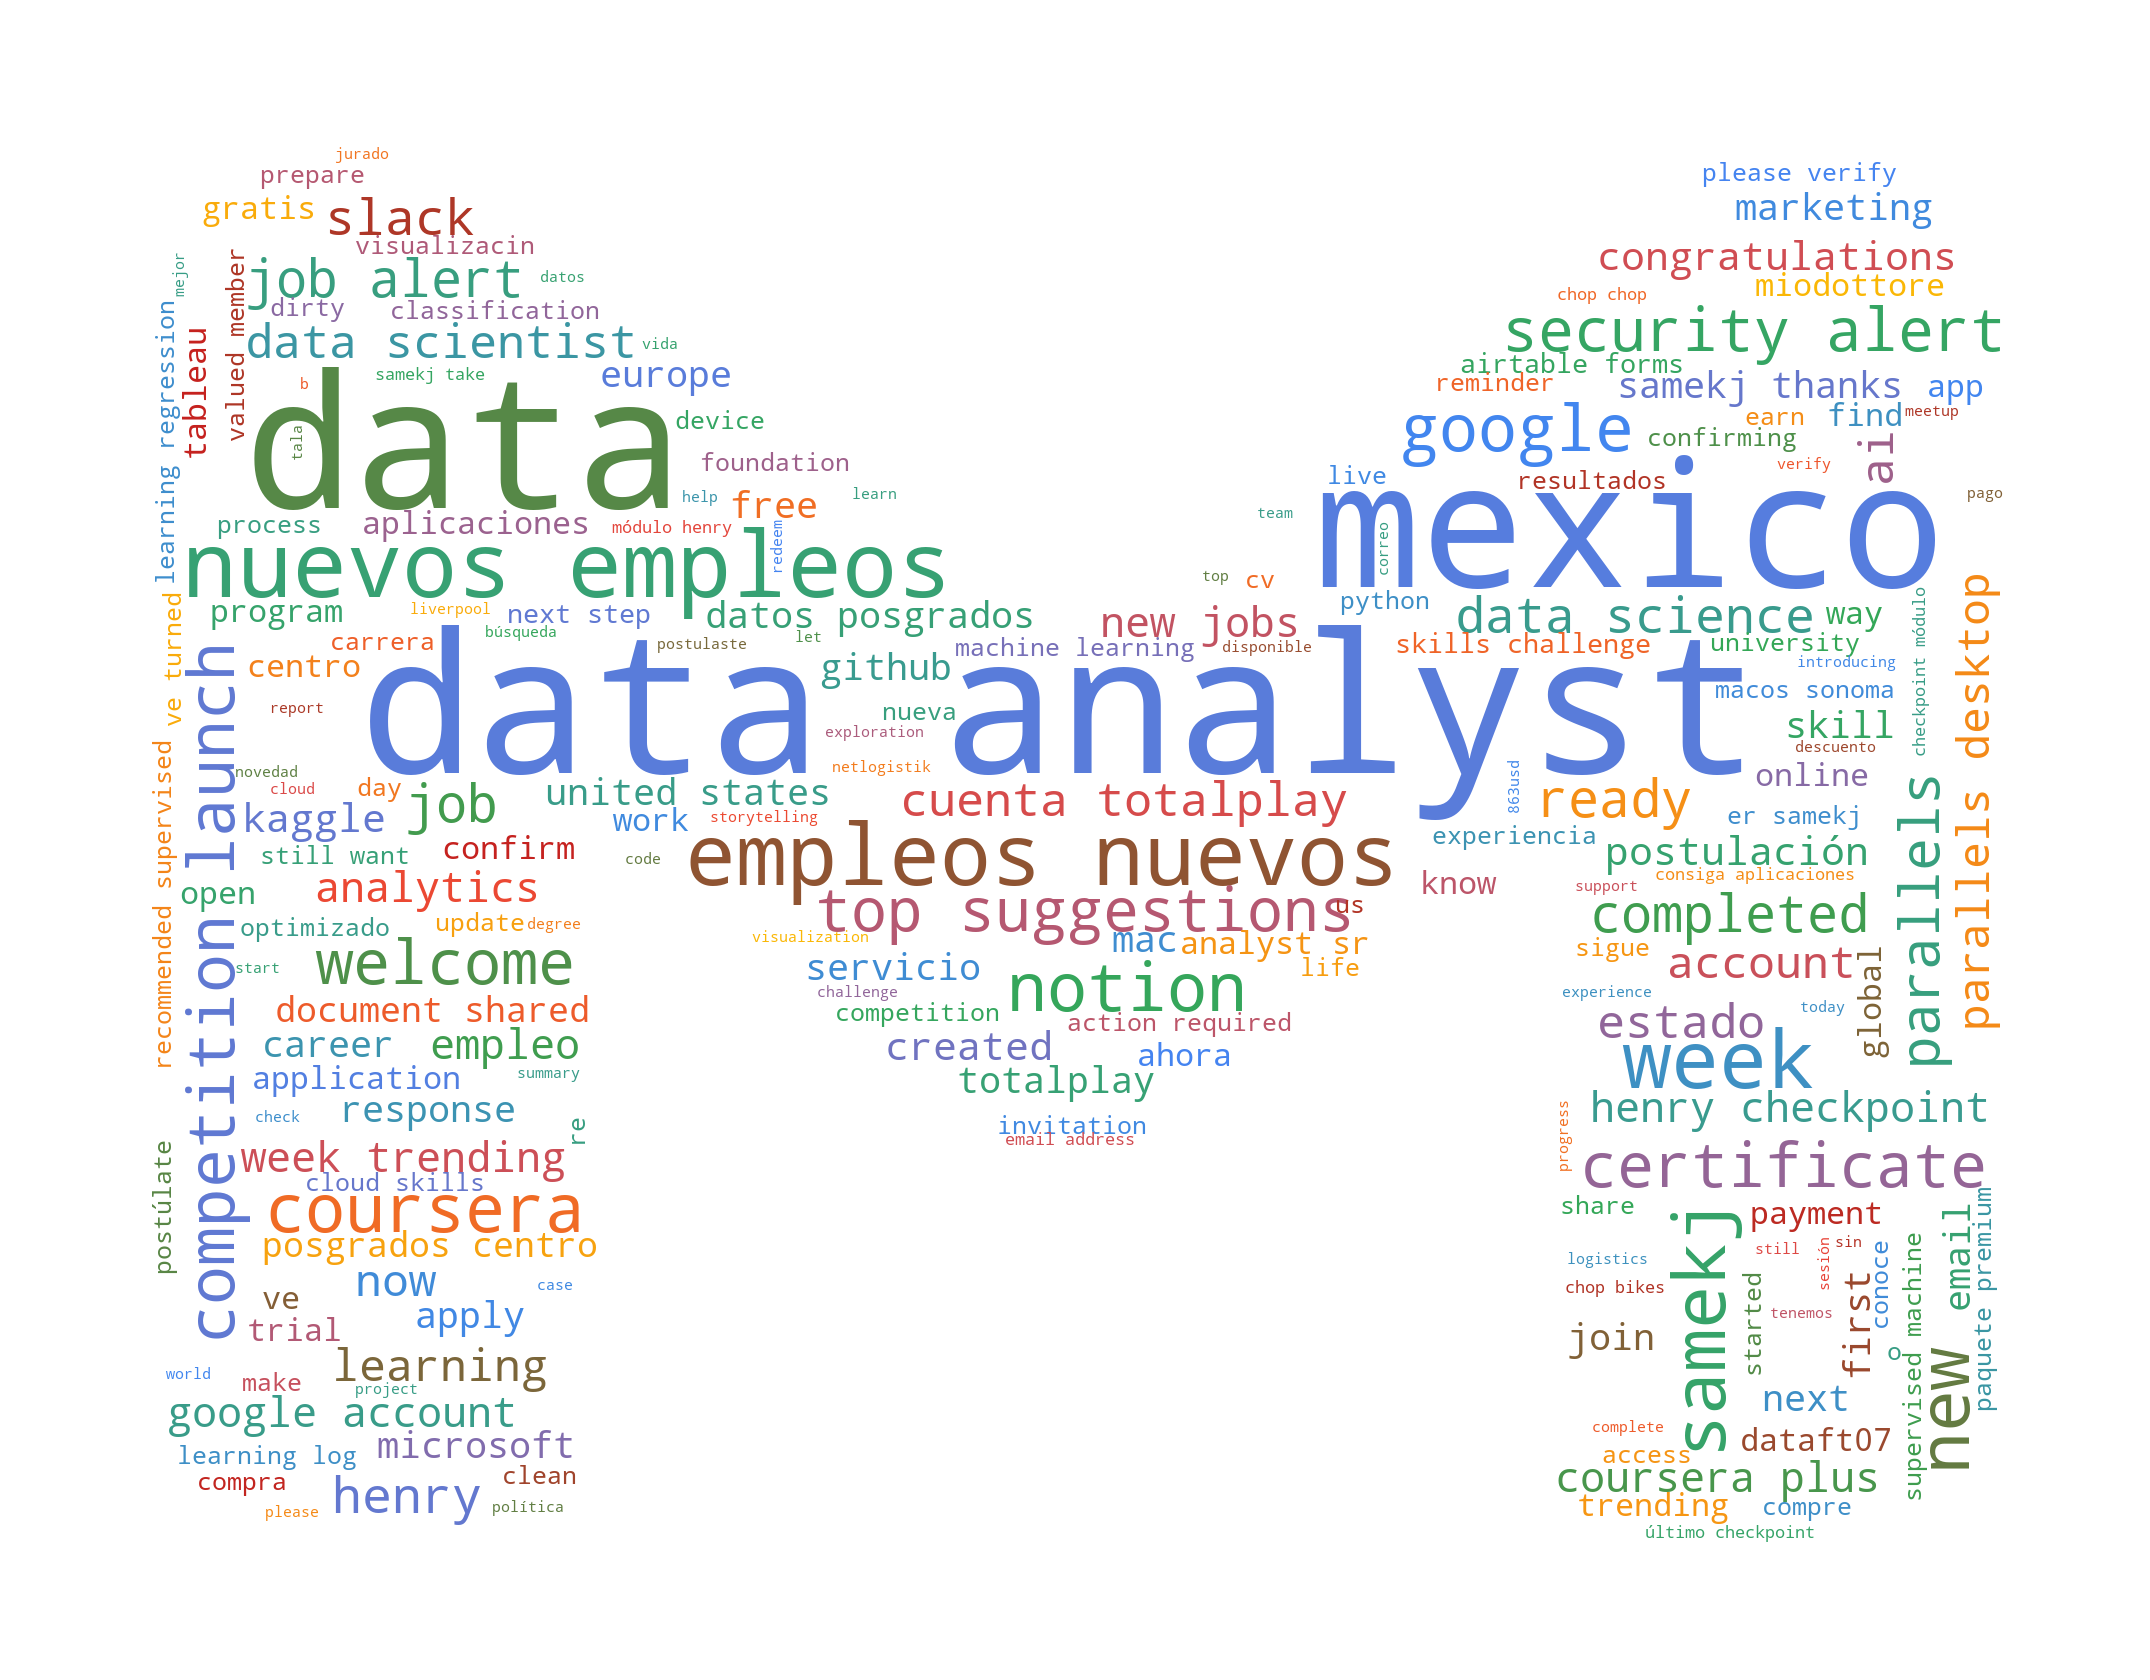

In [195]:
# Initialize an empty string 'total_subjects' to store subject text
total_subjects = ' '

# Define a list of stopwords and update the set of STOPWORDS
stopwords = STOPWORDS.update(['al', 'de', 'en', 'tu', 's', 'la', 'y', 'que', 'te', 'lo', 'el', 'la', 'solo', 'del', 'por',
                             'qué', 'que', 'ha', 'desde', 'por', 'ya', 'más', 'es', 'con', 'tus', 'para', 'se', 'los',
                             'un', 'una', 'las', 'esto', 'va', 'sobre', 'ti', 'los', 'sandro', 'agama', 'está',
                             'tienes notificaciones', 'este', 'día', 'hola', 'hoy','beach','serías', 'fl'])

# Load an image mask (e.g., Gmail logo) as a NumPy array
mask = np.array(Image.open('Resources/gmail.jpg'))

# Iterate through the 'Subject' column of the DataFrame 'email_df'
for mensaje in email_df['Subject'].values:
    # Convert subject text to lowercase and split into words
    subjects = str(mensaje).lower().split()
    # Concatenate words to the 'total_subjects' string
    for subject in subjects:
        total_subjects = total_subjects + subject + ' '

# Generate a WordCloud using the 'total_subjects' text
wordcloud = WordCloud(scale=2.5, width=1000, height=800,
                      background_color='white',
                      mask=mask,
                      colormap=gmail,
                      stopwords=stopwords,
                      min_font_size=6).generate(total_subjects)

# Display the WordCloud as an image
wordcloud.to_image()

In [196]:
# Save the WordCloud image in PNG format
wordcloud_image = wordcloud.to_image()
wordcloud_image.save('wordcloud.png', format='PNG')